Scope of this file is to play with the matrices Q and R to understand how the influence the position of the eigenvalues of the steady state LQR.
Let us start with the definition of the system.

In [2]:
pkg load control
clear all

% Init of the system
A = [-5 0; 1 -8]
B = [1; 0]

A =

  -5   0
   1  -8

B =

   1
   0



As usual first step is the check for controllability

In [3]:
% Controllability
Wc = [B A*B]
det(Wc)


Wc =

   1  -5
   0   1

ans =  1


Then we define the matrices Q and R
The bigger the coefficients of Q the faster the poles
The bigger the coefficient of R the slower the poles

In [30]:
Ql = [10 0;0 100]
Rl = 1

Ql =

    10     0
     0   100

Rl =  1


Then we perform the design and evaluate the position of the poles

In [31]:
% Control Design
K = lqr(A,B,Ql,Rl)

%Position eigenvalues control
lc = eig(A-B*K)

K =

   0.99096   0.44583

lc =

  -6.2450
  -7.7460



Then we define the matrices of the closed loop system to check the system response

In [32]:
% System Close loop without observer
Ts = 0.001
Acl2 = [A-B*K]
esol2 = expm(Acl2*Ts)


Ts =  0.0010000
Acl2 =

  -5.99096  -0.44583
   1.00000  -8.00000

esol2 =

   9.9403e-01  -4.4272e-04
   9.9303e-04   9.9203e-01



We set the initial conditions

In [33]:
x2(:,1) = [5; 5];

Finally we calculate and plot the transient response

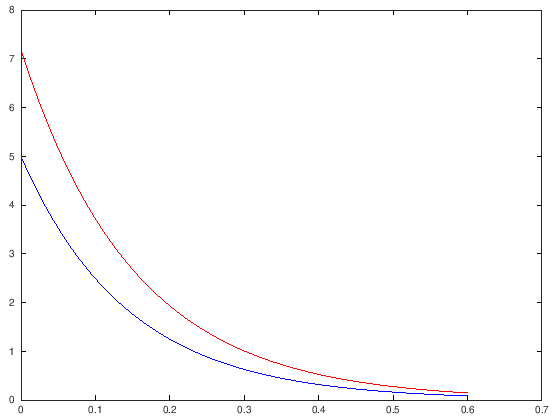

In [34]:
npoints = 600;

for i=1:npoints
  t(i) = (i-1)*Ts;
  x2(:,i+1)= esol2*x2(:,i); 
  u(i) = K*x2(:,i);
end
t(i+1) = npoints*Ts;
u(i+1) = K*x2(:,i+1);

plot(t,x2(2,:),'b',t,u,'r')

  